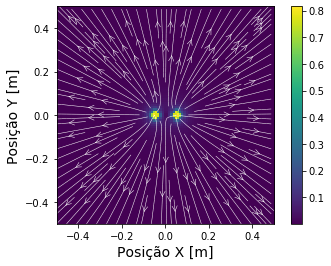

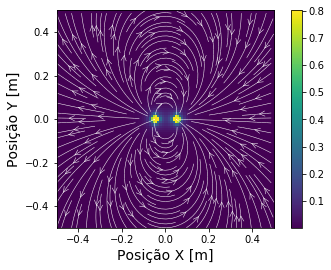

In [12]:
import numpy as np
import matplotlib.pyplot as plt

####################################################
#--Este programa calcula o potencial entre duas----#
#--cargas puntiformes e calcula o gradiente--------#
#--para obter o campo elétrico. As cargas são------#
#--separadas por uma distância d e possuem cargas--#
#--q1 e q2. A direção do campo é dita pela direção-#
#--dos vetores, enquanto que a intensidade é-------#
#--traduzida para cores.---------------------------#
####################################################

def E_field(D,q1,q2):
    # qi:    Valor das cargas em Coulomb
    # d:     Espaçamento entre pontos
    # D:     Distância entre cargas
    # N:     Escala do grid [N X N]
    # eps_0: Constante elétrica do vácuo
    # l:     Tamanho do plano
        
    d     = 1e-2       #[m]
    L     = 1          #[m]    
    eps_0 = 8.8542e-12 #[C^2 N^-1 m^-2]
    N     = int(L/d)
    
    # Um grid é formado para calcular o potencial em cada ponto
    x = y = np.linspace(-L/2, L/2, N)
    X,Y   = np.meshgrid(x,y, sparse = True)
    
    # R1 e R2 são as distâncias do ponto até as cargas
    R1  = ((X + D/2)**2 + Y**2)**0.5 
    R2  = ((X - D/2)**2 + Y**2)**0.5
    
    # O potencial é calculado a menos de constantes 1/(4πϵ_0)
    pot    = (q1/R1 + q2/R2)/(4*np.pi*eps_0)
    Ey, Ex = np.gradient(-pot)
    
    E_stream = plt.streamplot(x, y, Ex, Ey, linewidth=0.5, color = 'w',
                              density=1.5, arrowstyle='->', arrowsize=1.3)
    
    E_strgth = plt.imshow(np.hypot(Ex,Ey), extent = [-L/2, L/2, -L/2, L/2])
    
    plt.xlabel('Posição X [m]', size = 14)
    plt.ylabel('Posição Y [m]', size = 14)
    plt.colorbar(E_strgth)
    plt.show()

# As cargas são espaçadas por 10cm
D = 10e-2   #[m]

#Carga do elétron
q_e = 1.6e-12  #[C]

E_field(D, q_e, q_e)
E_field(D, q_e, -q_e)